# Think Bayes: Chapter 12

This notebook presents code and exercises from Think Bayes, second edition.

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
from __future__ import print_function, division

%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from itertools import product
from IPython.display import display
from scipy import stats
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import mythinkbayes as mtb
import numpy as np
import pandas as pd
import pdb

'Done'

'Done'

## Simple Model

Knowing that Alice and Bob scored 780 and 740, respectively, we want to answer the question:

> How strong is the evidence that Alice is better prepared than Bob?

Start with a model where all SAT questions are equally difficult, parameterized by a characteristic $P(\text{correct})$, the probability of answering the question correctly, for each test-taker.

> If we convert each scaled score to a raw score, and divide by the number of questions,
the result is an estimate of `p_correct`. So we can use the distribution of raw scores to
model the prior distribution of `p_correct`.

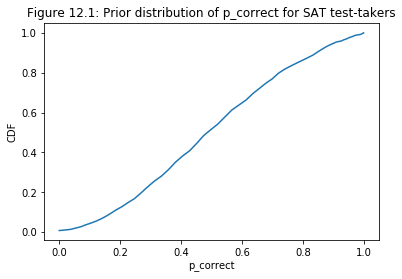

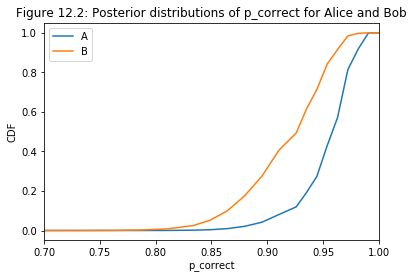

(0.7931232450413124, 0.16815187536329596, 0.07744975919078277)

In [85]:

import sys; sys.path.append('ThinkBayes2/code')
from sat import ReadRanks, ReadScale

class Student(mtb.PMF):
    
    def __init__(self, 
                 raw_max=54,
                 scale=ReadScale('ThinkBayes2/code/sat_scale.csv'), 
                 ranks=ReadRanks('ThinkBayes2/code/sat_ranks.csv')):
        
        # Make prior from ranks. Ranks use the scaled score.
        # Use the scale object to convert it back to the raw score.
        
        c = Counter()
        for scaled, freq in ranks:
            raw = scale.Reverse(scaled)
            raw = raw if raw > 0 else 0
            raw /= raw_max
            c[raw] += freq
            
        tmp = mtb.PMF.from_dict(c)
        super().__init__(tmp.hypos, tmp.probs)
        
        self.raw_max = raw_max
        self.scale = scale
        
    def likelihood(self, data, hypo):
        acc = hypo
        scaled = data
        raw = self.scale.Reverse(scaled)
        return stats.binom.pmf(raw, self.raw_max, acc)
    
        
stu = Student()
stu.to_cdf().plot()
plt.title('Figure 12.1: Prior distribution of p_correct for SAT test-takers')
plt.xlabel('p_correct')
plt.ylabel('CDF')
plt.show()

alice = Student()
alice.update(780)
alice.to_cdf().plot(label='A')

bob = Student()
bob.update(740)
bob.to_cdf().plot(label='B')

plt.xlim(0.7, 1)
plt.title('Figure 12.2: Posterior distributions of p_correct for Alice and Bob')
plt.xlabel('p_correct')
plt.ylabel('CDF')
plt.legend()
plt.show()

## Bayesian Hypothesis Test

To formulate the question in terms of Bayesian hypothesis testing, define two hypotheses:

- $A$: `p_correct` is higher for Alice than for Bob.
- $B$: `p_correct` is higher for Bob than for Alice.

In [87]:
prob_equal = alice == bob
prob_A = (alice > bob) + prob_equal / 2
prob_B = (alice < bob) + prob_equal / 2

print('P(A) = %.2lf' % prob_A)
print('P(B) = %.2lf' % prob_B)

P(A) = 0.79
P(B) = 0.21


I don't find this problem all that interesting, so I skip the remaining sections which outline a more nuanced model.